In [1]:
import setup

In [2]:
import iohelper.results as rio
from iohelper import hamiltonians
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from multiprocessing import Pool

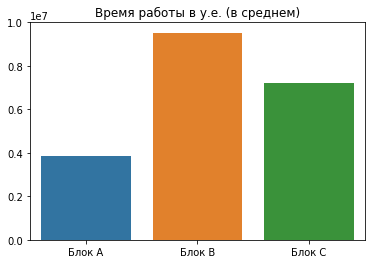

In [64]:
def avgne(collection_name):
    factor = 11 if 'block-b' in collection_name else 9
    reports = list(rio.load_all(collection_name))
    num_evaluations = [sum(m.num_circ_evaluations * (factor * m.circ.size + 1) for i in r.iterations for m in i.mutations) for r in reports]
    
    return np.average(num_evaluations)

colls = ['q4-block-a', 'q4-block-b', 'q4-block-cnot']
avgs = [avgne(c) for c in colls]

collsn = ['Блок A', 'Блок B', 'Блок C']
plt.title('Время работы в у.е. (в среднем)')
sns.barplot(collsn, avgs)

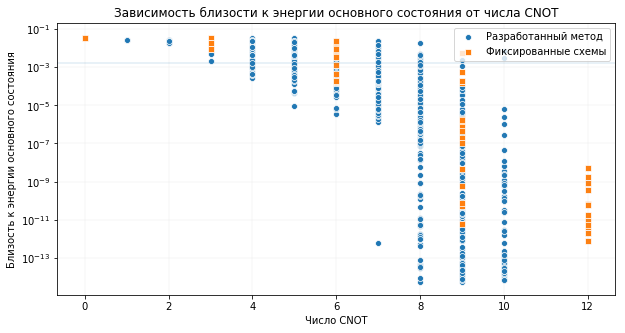

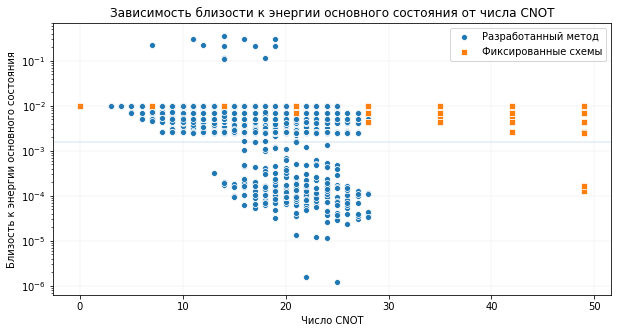

In [74]:
def cplot(task, reports_name, fixed_data_name):
    fixed_data = pd.read_csv('output/{}.csv'.format(fixed_data_name))
    reports = rio.load('collections', reports_name)
    
    gse = task.min_eigenvalue

#     data = np.array([[r.best_circuit.size, r.best_circuit_value - gse] for r in reports])
    data = np.array([[m.circ.size, m.value - gse] for r in reports for m in r.all_mutations])
    
    plt.figure(figsize=(10, 5))
    plt.title('Зависимость близости к энергии основного состояния от числа CNOT')
    plt.semilogy()
    plt.grid(True, linestyle='-', linewidth=0.1)
    plt.axhline(0.0016, linewidth=0.2)
    sns.scatterplot(data[:,0], data[:,1], label='Разработанный метод', marker='o')
    sns.scatterplot(fixed_data['n_cnots'], fixed_data['gse_proximity'], label='Фиксированные схемы', marker='s')
    plt.xlabel('Число CNOT')
    plt.ylabel('Близость к энергии основного состояния')
    plt.legend(loc='upper right')
    
cplot(hamiltonians.q4, 'LiH-6', '4-vqe')
cplot(hamiltonians.q8, 'BeH2-5', '8-vqe')

In [3]:
reports = rio.load('collections', 'BeH2-5')


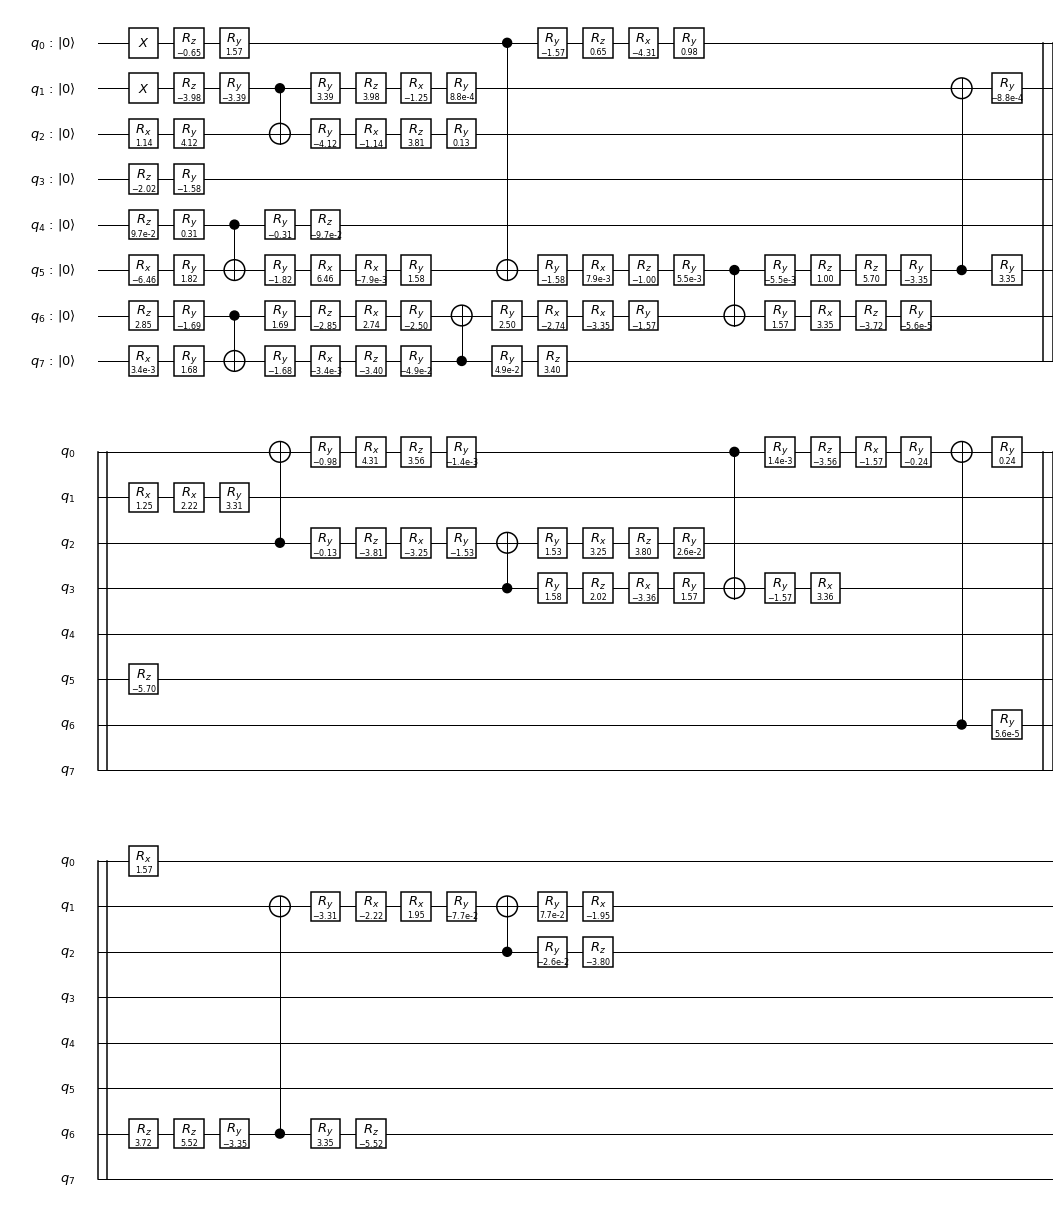

In [12]:
circs = [m.circ for r in reports for m in r.all_mutations if m.value - hamiltonians.q8.min_eigenvalue < 1.6e-3]
QCircuitConversions.to_qiskit_circuit(min(circs, key=lambda c: c.size)).draw(output='mpl')

In [11]:
from circuit import QCircuitConversions
